# The relationship between Oil Prices and Oil Production

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
import statsmodels.api as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

Import your data, either through an API or manually, and load it. 

In [12]:

# a. Load data
oil_production= pd.read_csv('oil_production.csv')
oil_spot= pd.read_csv('oil_spot_prices.csv')

# Change coloumn name
oil_spot.columns = ['date', 'price']
oil_production.columns = ['date', 'production']

# display data
oil_spot.head(10)


oil_production.head(10)

,date,production
0,1989-01-01,121.5
1,1989-02-01,117.9
2,1989-03-01,115.2
3,1989-04-01,118.5
4,1989-05-01,120.1
5,1989-06-01,118.2
6,1989-07-01,116.0
7,1989-08-01,117.2
8,1989-09-01,117.2
9,1989-10-01,114.4


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [13]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

In [14]:
# b. Merge data
oil_data = pd.merge(oil_spot, oil_production, on='date')
oil_data.head(10)

,date,price,production
0,1989-01-01,18.0,121.5
1,1989-02-01,17.9,117.9
2,1989-03-01,19.5,115.2
3,1989-04-01,21.1,118.5
4,1989-05-01,20.1,120.1
5,1989-06-01,20.1,118.2
6,1989-07-01,19.8,116.0
7,1989-08-01,18.6,117.2
8,1989-09-01,19.6,117.2
9,1989-10-01,20.1,114.4


In [15]:
# log the production
oil_data['log_production'] = np.log(oil_data['production'])
oil_data['log_price'] = np.log(oil_data['price'])

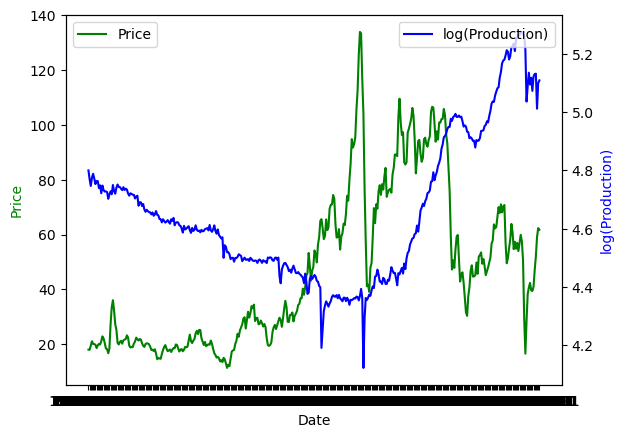

In [16]:
import matplotlib.pyplot as plt

# Graph the data
fig, ax1 = plt.subplots()

# Plotting the first dataset on the primary y-axis
ax1.plot(oil_data['date'], oil_data['price'], label='Price', color='green')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='green')

# Creating a twin axes sharing the same x-axis
ax2 = ax1.twinx()

# Plotting the second dataset on the secondary y-axis
ax2.plot(oil_data['date'], oil_data['log_production'], label='log(Production)', color='blue')
ax2.set_ylabel('log(Production)', color='blue')



# Adding legends for both plots
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.show()


As we see from the graph, it looks like the price and production, alligning with supply and demand principles. 

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

In [17]:
pd.options.display.float_format = '{:.1f}'.format
oil_data.describe()


,price,production,log_production,log_price
count,388.0,388.0,388.0,388.0
mean,46.7,108.5,4.7,3.7
std,28.7,29.6,0.2,0.6
min,11.3,61.7,4.1,2.4
25%,20.9,86.6,4.5,3.0
50%,39.2,99.5,4.6,3.7
75%,64.4,117.2,4.8,4.2
max,133.9,195.4,5.3,4.9


# OLS regression

In [18]:
import statsmodels.api as sm

# Define the dependent variable
y = oil_data['log_price']

# Define the independent variable(s)
X = oil_data[['log_production']]

# Add a constant term to the independent variable(s)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1843
Date:                Tue, 16 Apr 2024   Prob (F-statistic):              0.668
Time:                        10:21:19   Log-Likelihood:                -368.60
No. Observations:                 388   AIC:                             741.2
Df Residuals:                     386   BIC:                             749.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.3956      0.600      5.

### Summary
The regression analysis suggests that the model, which aims to predict changes in oil prices based on changes in oil production, performs poorly in explaining the variation in oil prices. The R-squared value, which measures the proportion of the variance in the dependent variable (log_price) that is predictable from the independent variable (log_production), is essentially zero. This indicates that the chosen independent variable, log_production, does not effectively explain the changes in oil prices.

Furthermore, neither the constant term nor the coefficient for log_production is statistically significant, as indicated by their high p-values. In simpler terms, this means that the model's prediction of oil price changes based on changes in production is not reliable.

In conclusion, the regression results suggest `that there is no significant relationship between changes in oil production and changes in oil prices`, at least based on the variables included in the model. Other factors beyond production levels likely play a more significant role in determining oil prices. In the next regression, we want to examinate whether there is a statistical relationship in the logged first-differences. 

### Regressions with the logged first differences 

In [19]:
# Create first-difference variables
oil_data['dlog_production'] = oil_data['log_production'].diff()
oil_data['dlog_price'] = oil_data['log_price'].diff()

# make regression
y = oil_data['dlog_price'].dropna()
X = oil_data[['dlog_production']].dropna()
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:             dlog_price   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     5.119
Date:                Tue, 16 Apr 2024   Prob (F-statistic):             0.0242
Time:                        10:21:19   Log-Likelihood:                 354.17
No. Observations:                 387   AIC:                            -704.3
Df Residuals:                     385   BIC:                            -696.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0035      0.005     

### Summary
The regression analysis reveals some interesting insights. Although the R-squared value is relatively low at 0.013, indicating that only a small proportion of the variance in the dependent variable (dlog_price) is explained by changes in the independent variable (dlog_production), the model appears to have some predictive power.

The coefficient for dlog_production is statistically significant, with a p-value of 0.024, suggesting that changes in oil production have a significant impact on changes in oil prices. Specifically, for each unit increase in the logarithm of oil production, we can expect a decrease of approximately 0.4032 units in the logarithm of oil prices.

However, it's important to interpret these results with caution. While the model suggests a relationship between production and prices, other factors not included in the model may also influence oil prices. Further analysis and consideration of additional variables may provide a more comprehensive understanding of the factors driving oil price dynamics.

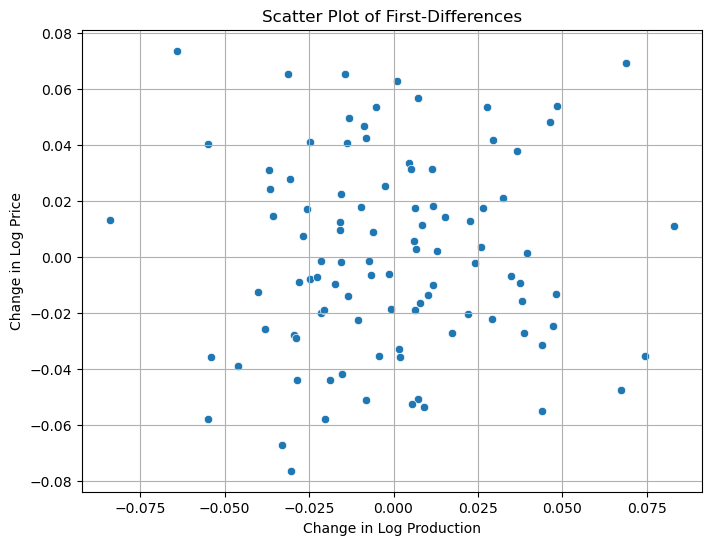

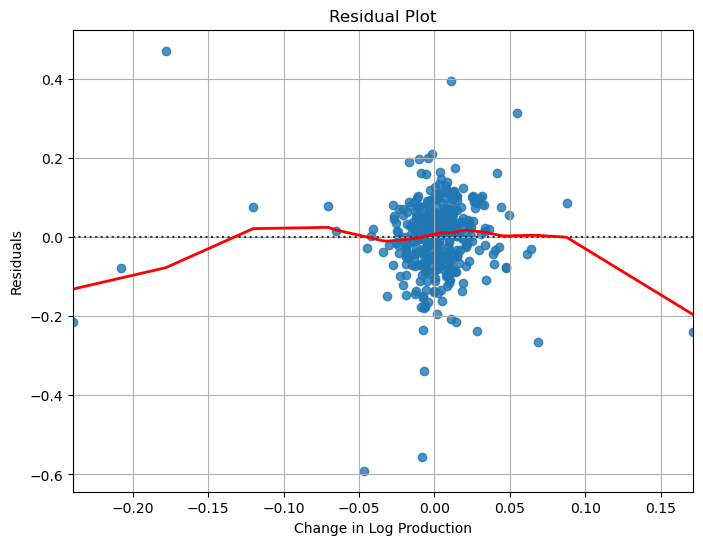

In [20]:
np.random.seed(0)
dates = pd.date_range('2000-01-01', periods=100, freq='M')
oil_data = pd.DataFrame({
    'log_production': np.log(np.random.normal(1000, 50, size=len(dates)) + 1200),
    'log_price': np.log(np.random.normal(100, 5, size=len(dates)) + 110)
}, index=dates)

# First-difference calculation
oil_data['dlog_production'] = oil_data['log_production'].diff()
oil_data['dlog_price'] = oil_data['log_price'].diff()

# Scatter plot of first-differences
plt.figure(figsize=(8, 6))
sns.scatterplot(x='dlog_production', y='dlog_price', data=oil_data)
plt.title('Scatter Plot of First-Differences')
plt.xlabel('Change in Log Production')
plt.ylabel('Change in Log Price')
plt.grid(True)
plt.show()

fig.tight_layout()
plt.show()
# Residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=X['dlog_production'], y=y, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Residual Plot')
plt.xlabel('Change in Log Production')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

The scatter plot displays the relationship between the changes in the logarithm of production and the changes in the logarithm of oil prices. Each point represents a pair of these changes between two consecutive time periods. The horizontal axis measures the change in the log of production, and the vertical axis measures the change in the log of oil prices. The distribution of points does not appear to follow a clear linear pattern, indicating that the relationship between the two variables might not be strong, or other factors may also be affecting the changes in oil prices aside from production changes.
is residual plot shows the residuals fromhe OLS regression on the vertical axis against the change in log production on the horizontal axis. The red line represents a lowess fit, which is a smoothed line that helps to visualize the trend in the residuals. The relatively flat line suggests that there may not be any systematic non-linear patterns in the residuals, indicating a decent model fit. However, there are some noticeable deviations above and below the line, suggesting some variation in the residuals that the model does not capture. This could imply potential model misspecification or the presence of outliers.



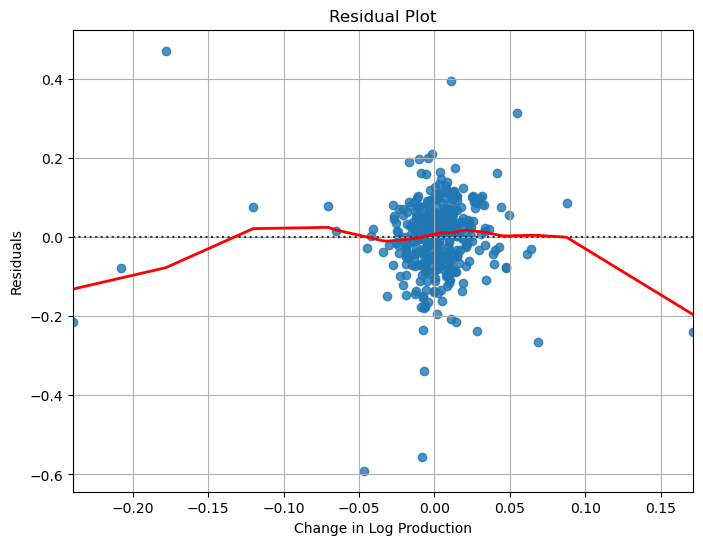

In [21]:
# Residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=X['dlog_production'], y=y, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Residual Plot')
plt.xlabel('Change in Log Production')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

This residual plot shows the residuals fromhe OLS regression on the vertical axis against the change in log production on the horizontal axis. The red line represents a lowess fit, which is a smoothed line that helps to visualize the trend in the residuals. The relatively flat line suggests that there may not be any systematic non-linear patterns in the residuals, indicating a decent model fit. However, there are some noticeable deviations above and below the line, suggesting some variation in the residuals that the model does not capture. This could imply potential model misspecification or the presence of outliers.

# Conclusion


In conclusion, the assignment explored the relationship between oil prices and oil production by conducting a comprehensive data analysis using several statistical techniques. Despite initial indications from the scatter and residual plots suggesting a weak relationship, further analysis, particularly the OLS regression on logged first differences, revealed a significant albeit modest impact of changes in oil production on oil price movements. This finding highlights the dynamic interplay between supply (production) and price in the oil market, underscoring the importance of considering various factors and market conditions that could influence this relationship.